# Spis Treści

- [Importowanie bibliotek](#Importowanie-bibliotek)
- [Wczytywanie zbioru z danymi rowerowymi](#Wczytywanie-zbioru-z-danymi-rowerowymi)
  - [Filtrowanie danych](#Filtrowanie-danych)
  - [Analiza wstępna](#Analiza-wstepna)
- [Wczytywanie zbioru z danymi pogodowymi](#Wczytywanie-zbioru-z-danymi-pogodowymi)
  - [Objaśnienie zmiennych](#Objasnienie-zmiennych)
  - [Brakujące dane](#Brakujace-dane)
- [Związki między danymi](#Zwiazki-miedzy-danymi)
  - [Łączenie danych](#Laczenie-danych)
  - [Korelacje między zmiennymi](#Korelacje-miedzy-zmiennymi)
  - [Szczegółowe wpływy kalendarzowe](#Szczegolowe-wplywy-kalendarzowe)
  - [Poszczególne dni z najwyższym i najniższym ruchem w mieście](#Poszczegolne-dni-z-najwyzszym-i-najnizszym-ruchem-w-miescie)
- [Model predykcyjny](#Model-predykcyjny)
  - [Rozkład zmiennej objaśnianej](#Rozklad-zmiennej-objasnianej)
  - [Tworzenie modelu predykcyjnego](#Tworzenie-modelu-predykcyjnego)
  - [Wybór cech](#Wybor-cech)
  - [Normalizacja cech](#Normalizacja-cech)
  - [Podział danych na zbiory](#Podzial-danych-na-zbiory)
  - [Stworzenie modelu](#Stworzenie-modelu)
  - [Ocena działania modelu](#Ocena-dzialania-modelu)
	
---


# Importowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from keras.losses import Huber

import warnings
warnings.filterwarnings('ignore')

---

# Wczytywanie zbioru z danymi rowerowymi

In [2]:
data = pd.read_csv('Liczniki - dzienne.csv',index_col='Date')
data.index = pd.to_datetime(data.index,format='%Y-%m-%d')
data.head()

,Armii Krajowej,Bora-Komorowskiego,Bulwary,Dworzec Główny,Grzegórzecka,Kamieńskiego,Klimeckiego,Kopernika,Kotlarska,Mogilska,...,Nowohucka,Smoleńsk,Tyniecka,Wadowicka,Wielicka,Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Średnia temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów [mm]
Date,,,,,,,,,,,,,,,,,,,,,
2016-11-18,NaN,NaN,421,NaN,NaN,NaN,NaN,NaN,560,907,...,NaN,NaN,NaN,212,329,14.2,2.1,6.3,-0.6,0.0
2016-11-19,NaN,NaN,328,NaN,NaN,NaN,NaN,NaN,232,438,...,NaN,NaN,NaN,206,151,14.2,3.8,9.2,1.0,3.2
2016-11-20,NaN,NaN,539,NaN,NaN,NaN,NaN,NaN,285,549,...,NaN,NaN,NaN,212,182,12.9,4.9,8.0,1.5,0.0
2016-11-21,NaN,NaN,1002,NaN,NaN,NaN,NaN,NaN,953,1501,...,NaN,NaN,NaN,382,479,18.4,5.8,10.3,2.5,0.0
2016-11-22,NaN,NaN,1132,,NaN,NaN,NaN,NaN,1039,1626,...,NaN,NaN,NaN,386,502,15.8,3.1,7.8,0.5,0.0


## Filtrowanie danych

In [3]:
# complete data starts on '2020-12-08'
data = data[data.index > '2020-12-08']

measuring_stations = ['Armii Krajowej','Bora-Komorowskiego','Bulwary','Dworzec Główny',
                      'Grzegórzecka','Kamieńskiego','Klimeckiego','Kopernika','Kotlarska',
                      'Mogilska','Monte Cassino','Niepołomska','Nowohucka','Smoleńsk',
                      'Tyniecka','Wadowicka','Wielicka']

bikers_data = data[measuring_stations]
bikers_data = bikers_data.astype('float64')
bikers_data['Total'] = bikers_data.sum(axis=1)
bikers_data['week_day'] = bikers_data.index.dayofweek
bikers_data['is_weekend'] = (bikers_data['week_day'] >= 5).astype(int)
bikers_data

,Armii Krajowej,Bora-Komorowskiego,Bulwary,Dworzec Główny,Grzegórzecka,Kamieńskiego,Klimeckiego,Kopernika,Kotlarska,Mogilska,Monte Cassino,Niepołomska,Nowohucka,Smoleńsk,Tyniecka,Wadowicka,Wielicka,Total,week_day,is_weekend
Date,,,,,,,,,,,,,,,,,,,,
2020-12-09,238.0,323.0,595.0,731.0,942.0,194.0,516.0,1121.0,1008.0,1230.0,740.0,173.0,223.0,573.0,301.0,527.0,570.0,10005.0,2,0
2020-12-10,143.0,218.0,413.0,561.0,737.0,152.0,406.0,895.0,776.0,890.0,535.0,94.0,166.0,420.0,220.0,404.0,425.0,7455.0,3,0
2020-12-11,174.0,198.0,365.0,550.0,863.0,154.0,375.0,901.0,784.0,878.0,571.0,81.0,176.0,433.0,190.0,474.0,398.0,7565.0,4,0
2020-12-12,127.0,140.0,316.0,344.0,656.0,152.0,215.0,532.0,513.0,533.0,397.0,136.0,132.0,319.0,185.0,259.0,198.0,5154.0,5,1
2020-12-13,140.0,128.0,331.0,293.0,619.0,96.0,193.0,494.0,443.0,434.0,387.0,187.0,127.0,267.0,219.0,215.0,177.0,4750.0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-28,999.0,1095.0,2239.0,3100.0,2825.0,1580.0,1911.0,2932.0,3373.0,4045.0,2667.0,1080.0,1233.0,1263.0,1903.0,2057.0,1828.0,36130.0,2,0
2025-05-29,737.0,613.0,1146.0,1942.0,1919.0,806.0,1013.0,1841.0,1927.0,2452.0,1473.0,401.0,667.0,870.0,868.0,1182.0,1019.0,20876.0,3,0
2025-05-30,1031.0,1025.0,2023.0,2730.0,2555.0,1438.0,1677.0,2490.0,2736.0,3411.0,2228.0,854.0,1023.0,1292.0,1646.0,1958.0,1631.0,31748.0,4,0


## Analiza wstepna

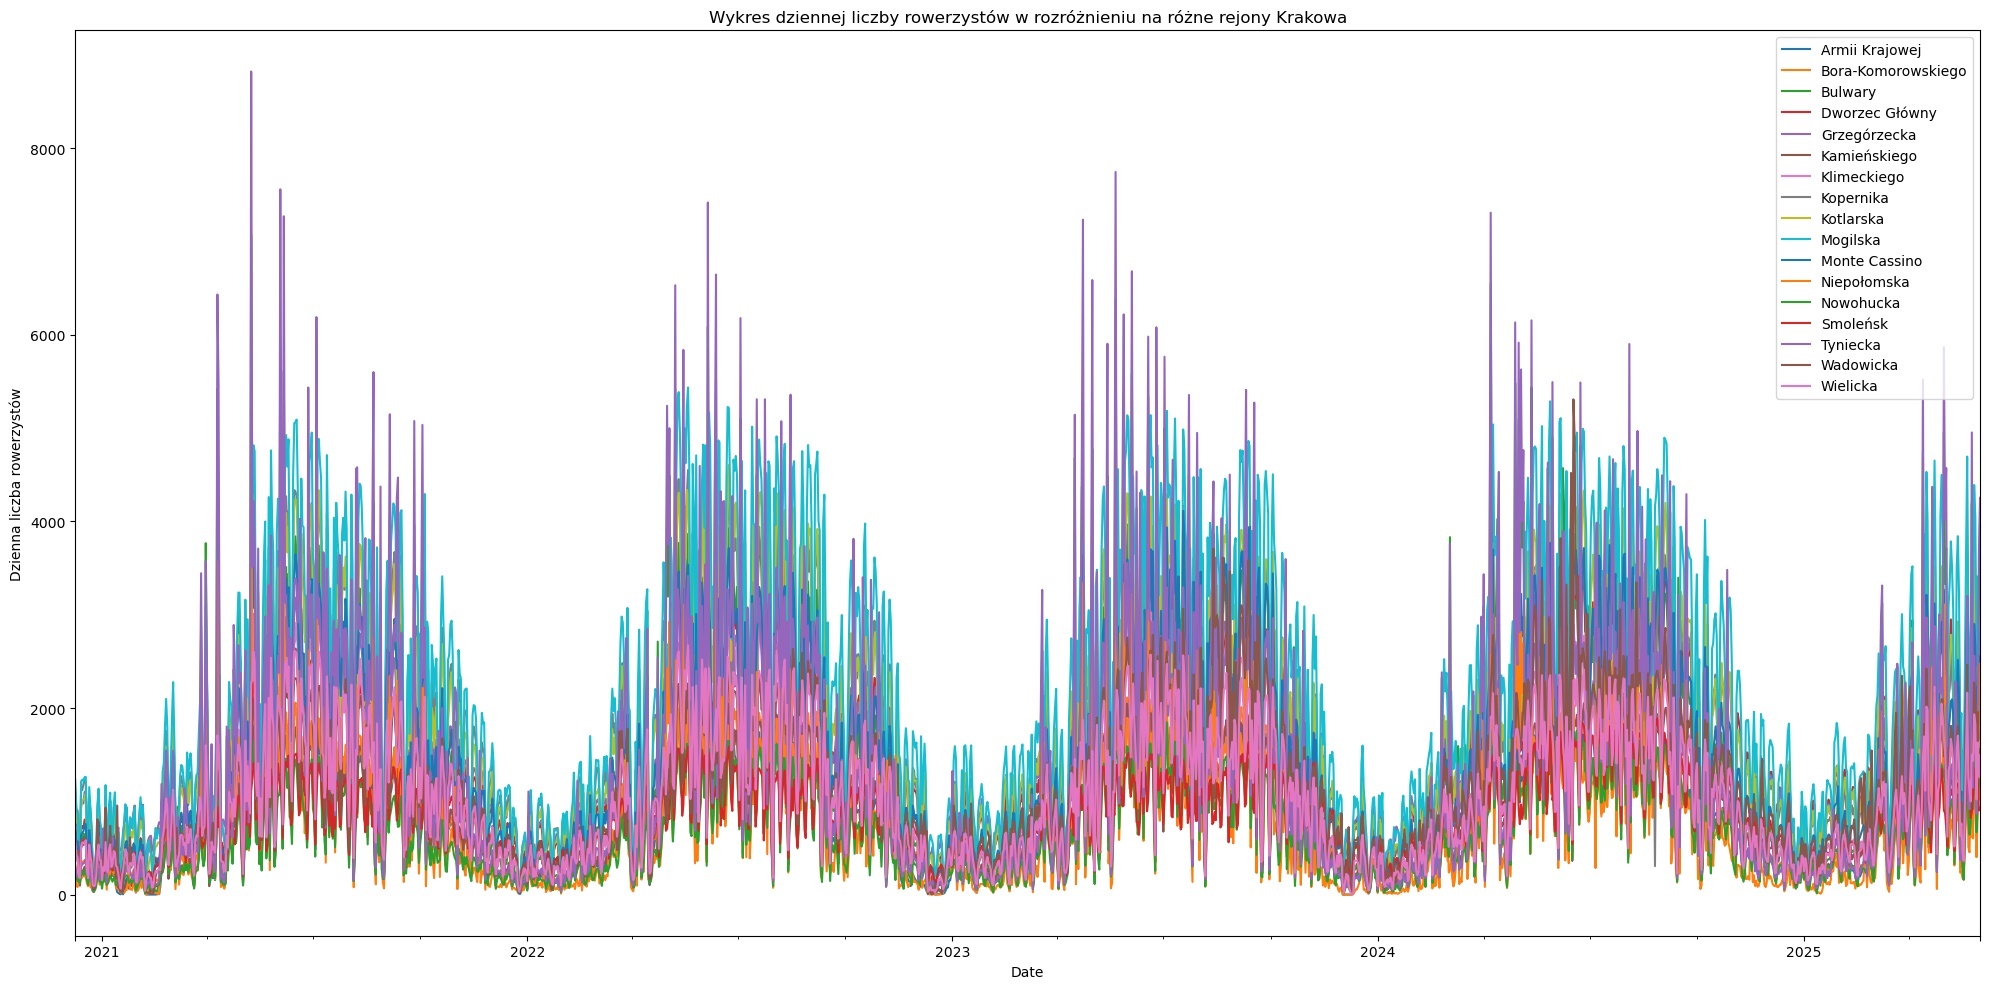

In [4]:
fig,ax = plt.subplots(figsize=(20,10))
bikers_data[measuring_stations].plot(ax=ax)
ax.set_title('Wykres dziennej liczby rowerzystów w rozróżnieniu na różne rejony Krakowa')
ax.set_ylabel('Dzienna liczba rowerzystów')
plt.tight_layout()
plt.show()

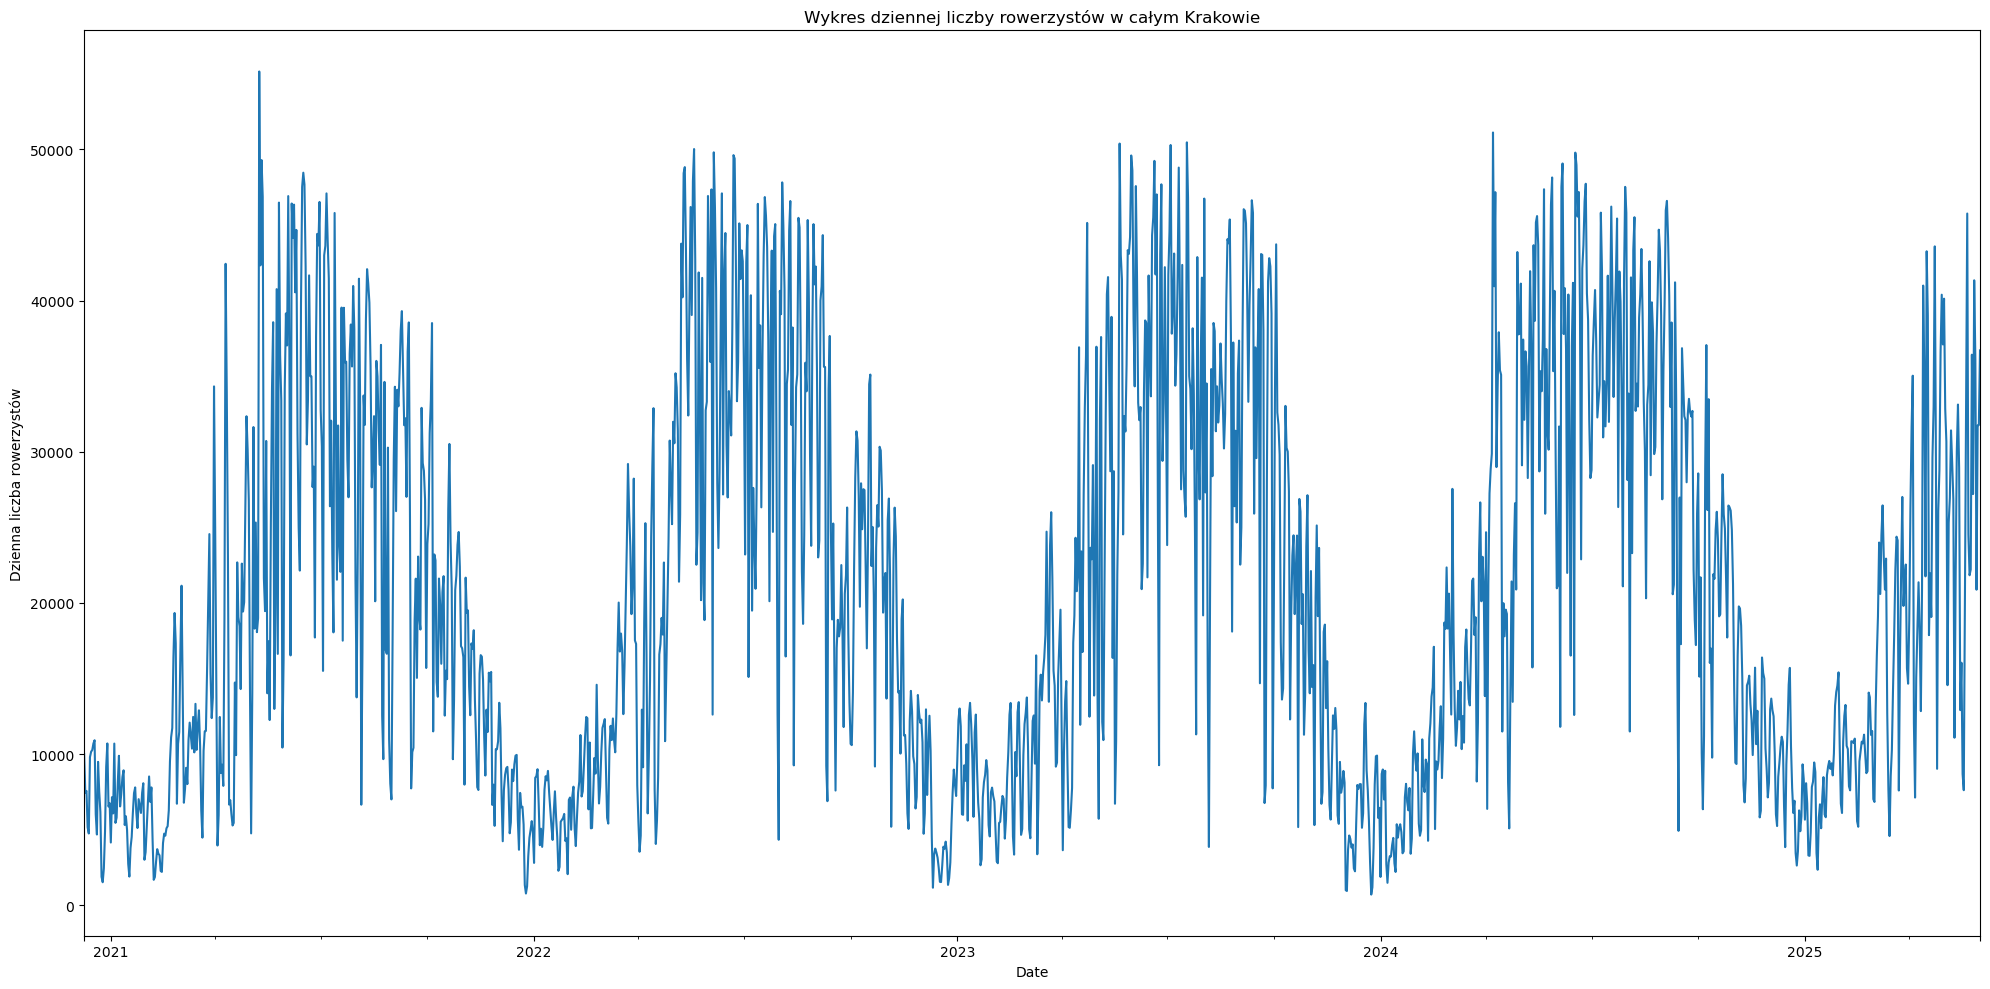

In [5]:
fig,ax = plt.subplots(figsize=(20,10))
bikers_data['Total'].plot(ax=ax)
ax.set_ylabel('Dzienna liczba rowerzystów')
ax.set_title('Wykres dziennej liczby rowerzystów w całym Krakowie')
plt.tight_layout()
plt.show()

### Trendy roczne
Możemy tutaj zauważyć, że ogólny trend ruchu rowerowego w Krakowie powtarza się co roku, ruch nasila się latem i słabnie w okresie zimowym. <br>
Rzeczą wartą odnotowania jest fakt, że okres po pandemii Covid-19 w żaden sposób nie odznacza się na wykresie, nie widać wzrostu ani spadku <br>
aktywności w kolejnych latach. <br>

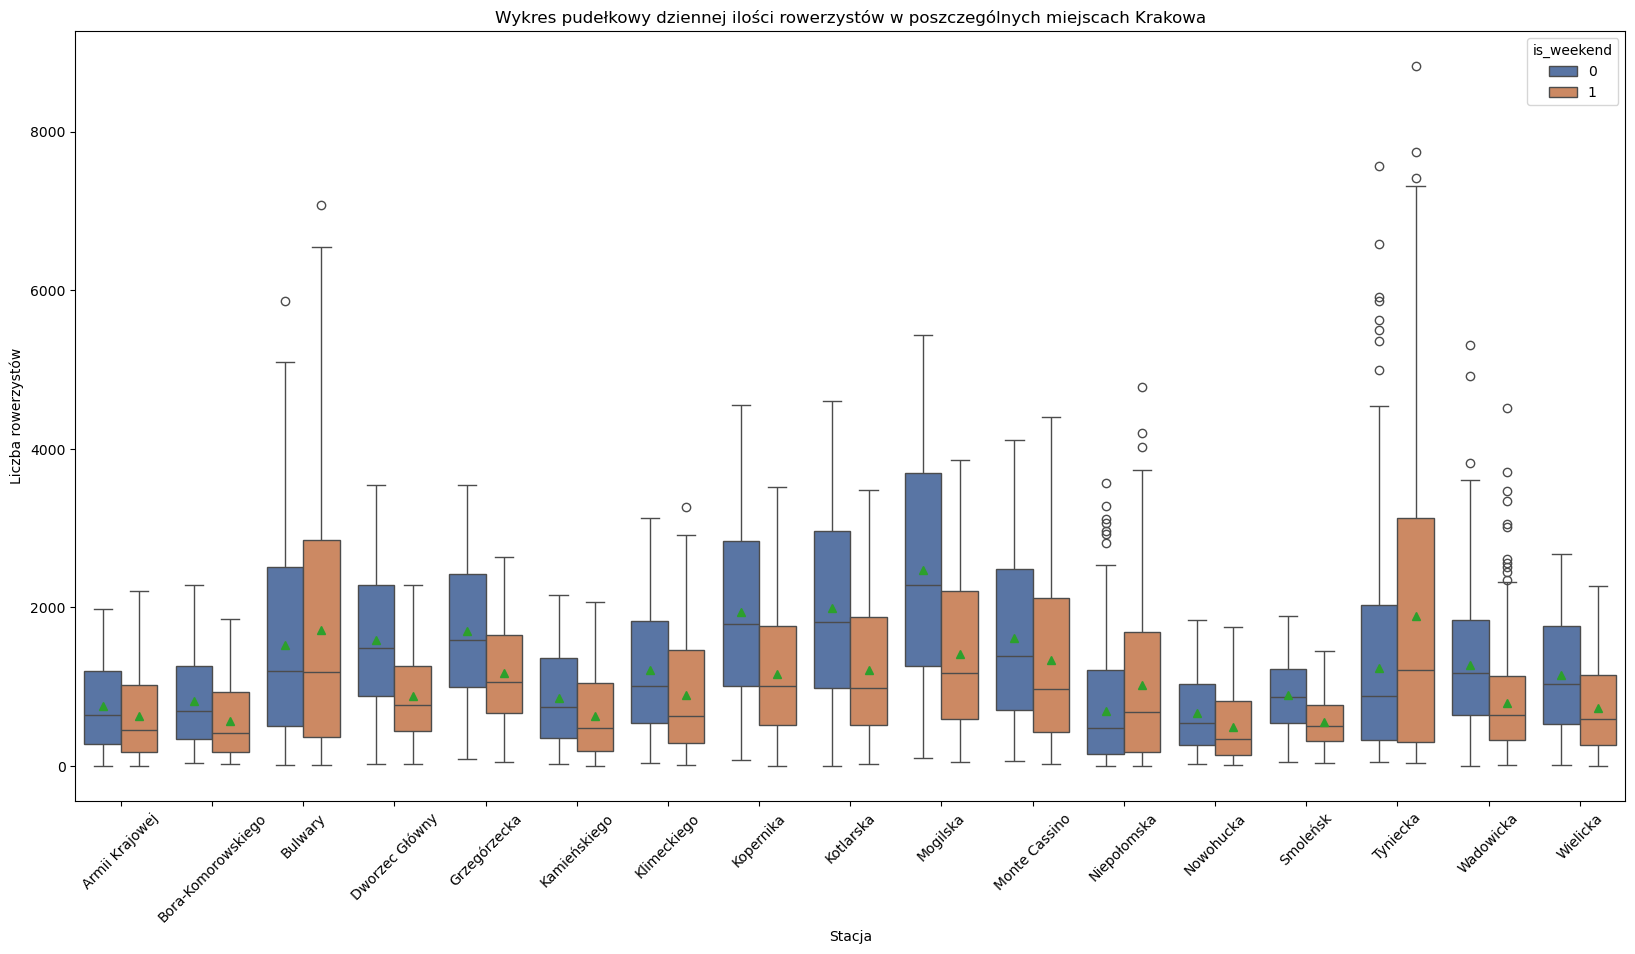

,Armii Krajowej,Bora-Komorowskiego,Bulwary,Dworzec Główny,Grzegórzecka,Kamieńskiego,Klimeckiego,Kopernika,Kotlarska,Mogilska,Monte Cassino,Niepołomska,Nowohucka,Smoleńsk,Tyniecka,Wadowicka,Wielicka,Total
min,0.000000,26.000000,14.000000,31.000000,49.000000,7.000000,20.000000,0.000000,0.000000,53.000000,26.000000,0.000000,11.000000,35.000000,36.000000,1.000000,4.000000,709.00000
max,2207.000000,2285.000000,7075.000000,3545.000000,3543.000000,2156.000000,3266.000000,4552.000000,4606.000000,5436.000000,4407.000000,4781.000000,1847.000000,1889.000000,8824.000000,5309.000000,2672.000000,55156.00000
mean,719.663814,751.556846,1581.623472,1389.650978,1548.423594,796.133863,1121.893643,1722.268949,1774.170538,2172.120416,1530.496944,790.959046,621.352294,797.042176,1426.669927,1142.042176,1032.507335,20918.19621
median,590.000000,612.500000,1198.500000,1223.000000,1429.500000,679.000000,919.500000,1539.000000,1551.000000,1920.000000,1282.000000,541.500000,503.000000,746.500000,961.500000,988.000000,905.000000,18096.00000


In [6]:
fig,axes = plt.subplots(figsize=(20,10))

data_melted = bikers_data.drop(['Total','week_day'],axis=1).melt(id_vars='is_weekend',var_name='Stacja',value_name='Liczba rowerzystów')

sns.boxplot(data=data_melted, x='Stacja', y='Liczba rowerzystów', hue='is_weekend', showmeans=True,palette='deep')
axes.set_title('Wykres pudełkowy dziennej ilości rowerzystów w poszczególnych miejscach Krakowa')
axes.set_ylabel('Liczba rowerzystów')
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

bikers_data_stats = bikers_data.agg(['min','max','mean','median']).drop(['week_day','is_weekend'],axis=1)
bikers_data_stats

Średnia ilość rowerzystów w weekend różni się od średniej liczby rowerzystów w tygodniu, zatem dzień tygodnia prawdopodobnie ma wpływ na liczbę rowerzystów. <br>

Co do wartości odstających, największa ich ilość została wykryta przez mierniki przy ulicach: Niepołomska, Tyniecka, oraz Wadowicka. Każda z tych ulic znajduje się w znacznej odległości od centrum Krakowa, a więc możliwym wyjaśnieniem tego zjawiska jest zwiększenie aktywności rowerowej lokalnych mieszkańców w tygodniu w przypadku sprzyjających warunków atmosferycznych, oraz wybór tych miejsc na weekendową wycieczkę rowerową.

---

# Wczytywanie zbioru z danymi pogodowymi

In [7]:
data2 = pd.read_csv('weather_data.csv',index_col='date')
data2.index = pd.to_datetime(data2.index,format='%Y-%m-%d %H:%M:%S')
data2 = data2[data2.index > '2020-12-08']
data2 = data2[data2.index < '2025-06-02']
data2 = data2.drop(['tsun','wdir'],axis=1)
data2

,tavg,tmin,tmax,prcp,snow,wspd,wpgt,pres
date,,,,,,,,
2020-12-09,-1.9,-2.7,-0.5,0.0,NaN,21.6,37.0,1015.6
2020-12-10,-1.7,-2.8,-0.4,0.0,10.0,15.9,38.9,1010.6
2020-12-11,-1.2,-3.0,0.2,2.5,20.0,8.6,22.2,1009.4
2020-12-12,0.2,-1.0,1.3,0.0,10.0,12.2,25.9,1006.5
2020-12-13,0.0,-0.3,1.3,0.0,NaN,4.8,13.0,1013.9
...,...,...,...,...,...,...,...,...
2025-05-28,15.3,7.0,22.7,0.0,NaN,13.0,37.0,1013.5
2025-05-29,14.1,12.0,17.3,1.3,NaN,17.3,44.5,1014.2
2025-05-30,13.8,8.0,18.6,1.8,NaN,13.9,33.3,1019.9


## Objasnienie zmiennych

**tavg** - średnia temperatura [°C]

**tmin** - minimalna temperatura [°C]

**tmax** - maksymalna temperatura [°C]

**prcp** - opady atmosferyczne [mm]

**snow** - grubość pokrywy śnieżnej [mm]

**wspd** - prędkość wiatru [km/h]

**wpgt** - najszybszy poryw wiatru [km/h]

**pres** - ciśnienie atmosferyczne [hPa]

## Brakujace dane

In [8]:
for col in data2.columns:
    print(f'Liczba brakujących wartości dla {col}: {data2[col].isna().sum()}\n')

Liczba brakujących wartości dla tavg: 0

Liczba brakujących wartości dla tmin: 0

Liczba brakujących wartości dla tmax: 0

Liczba brakujących wartości dla prcp: 131

Liczba brakujących wartości dla snow: 1509

Liczba brakujących wartości dla wspd: 0

Liczba brakujących wartości dla wpgt: 11

Liczba brakujących wartości dla pres: 0



Dla NaN w snow podmieniamy NaN na 0, ponieważ brakujące dane najprawdopodobniej oznaczają zerowy poziom grubości pokrywy śnieżnej. Brakujące dane w wpgt pochodzą z 11-dniowego okresu 03-06-2022 - 13-06-2022, przyczyna brakujących danych jest nieznana choć można przypuszczać, że to przez awarię miernika lub prace remontowe. Ze względu na niewielką ilość brakujących danych usuniemy rekordy z tymi datami. Dla NaN w prcp ciężko znaleźć sensowny powód występowania, zakładamy, że jest to spowodowane awarią sprzętu i interpolujemy liniowo dane w wierszach z brakującymi danymi.

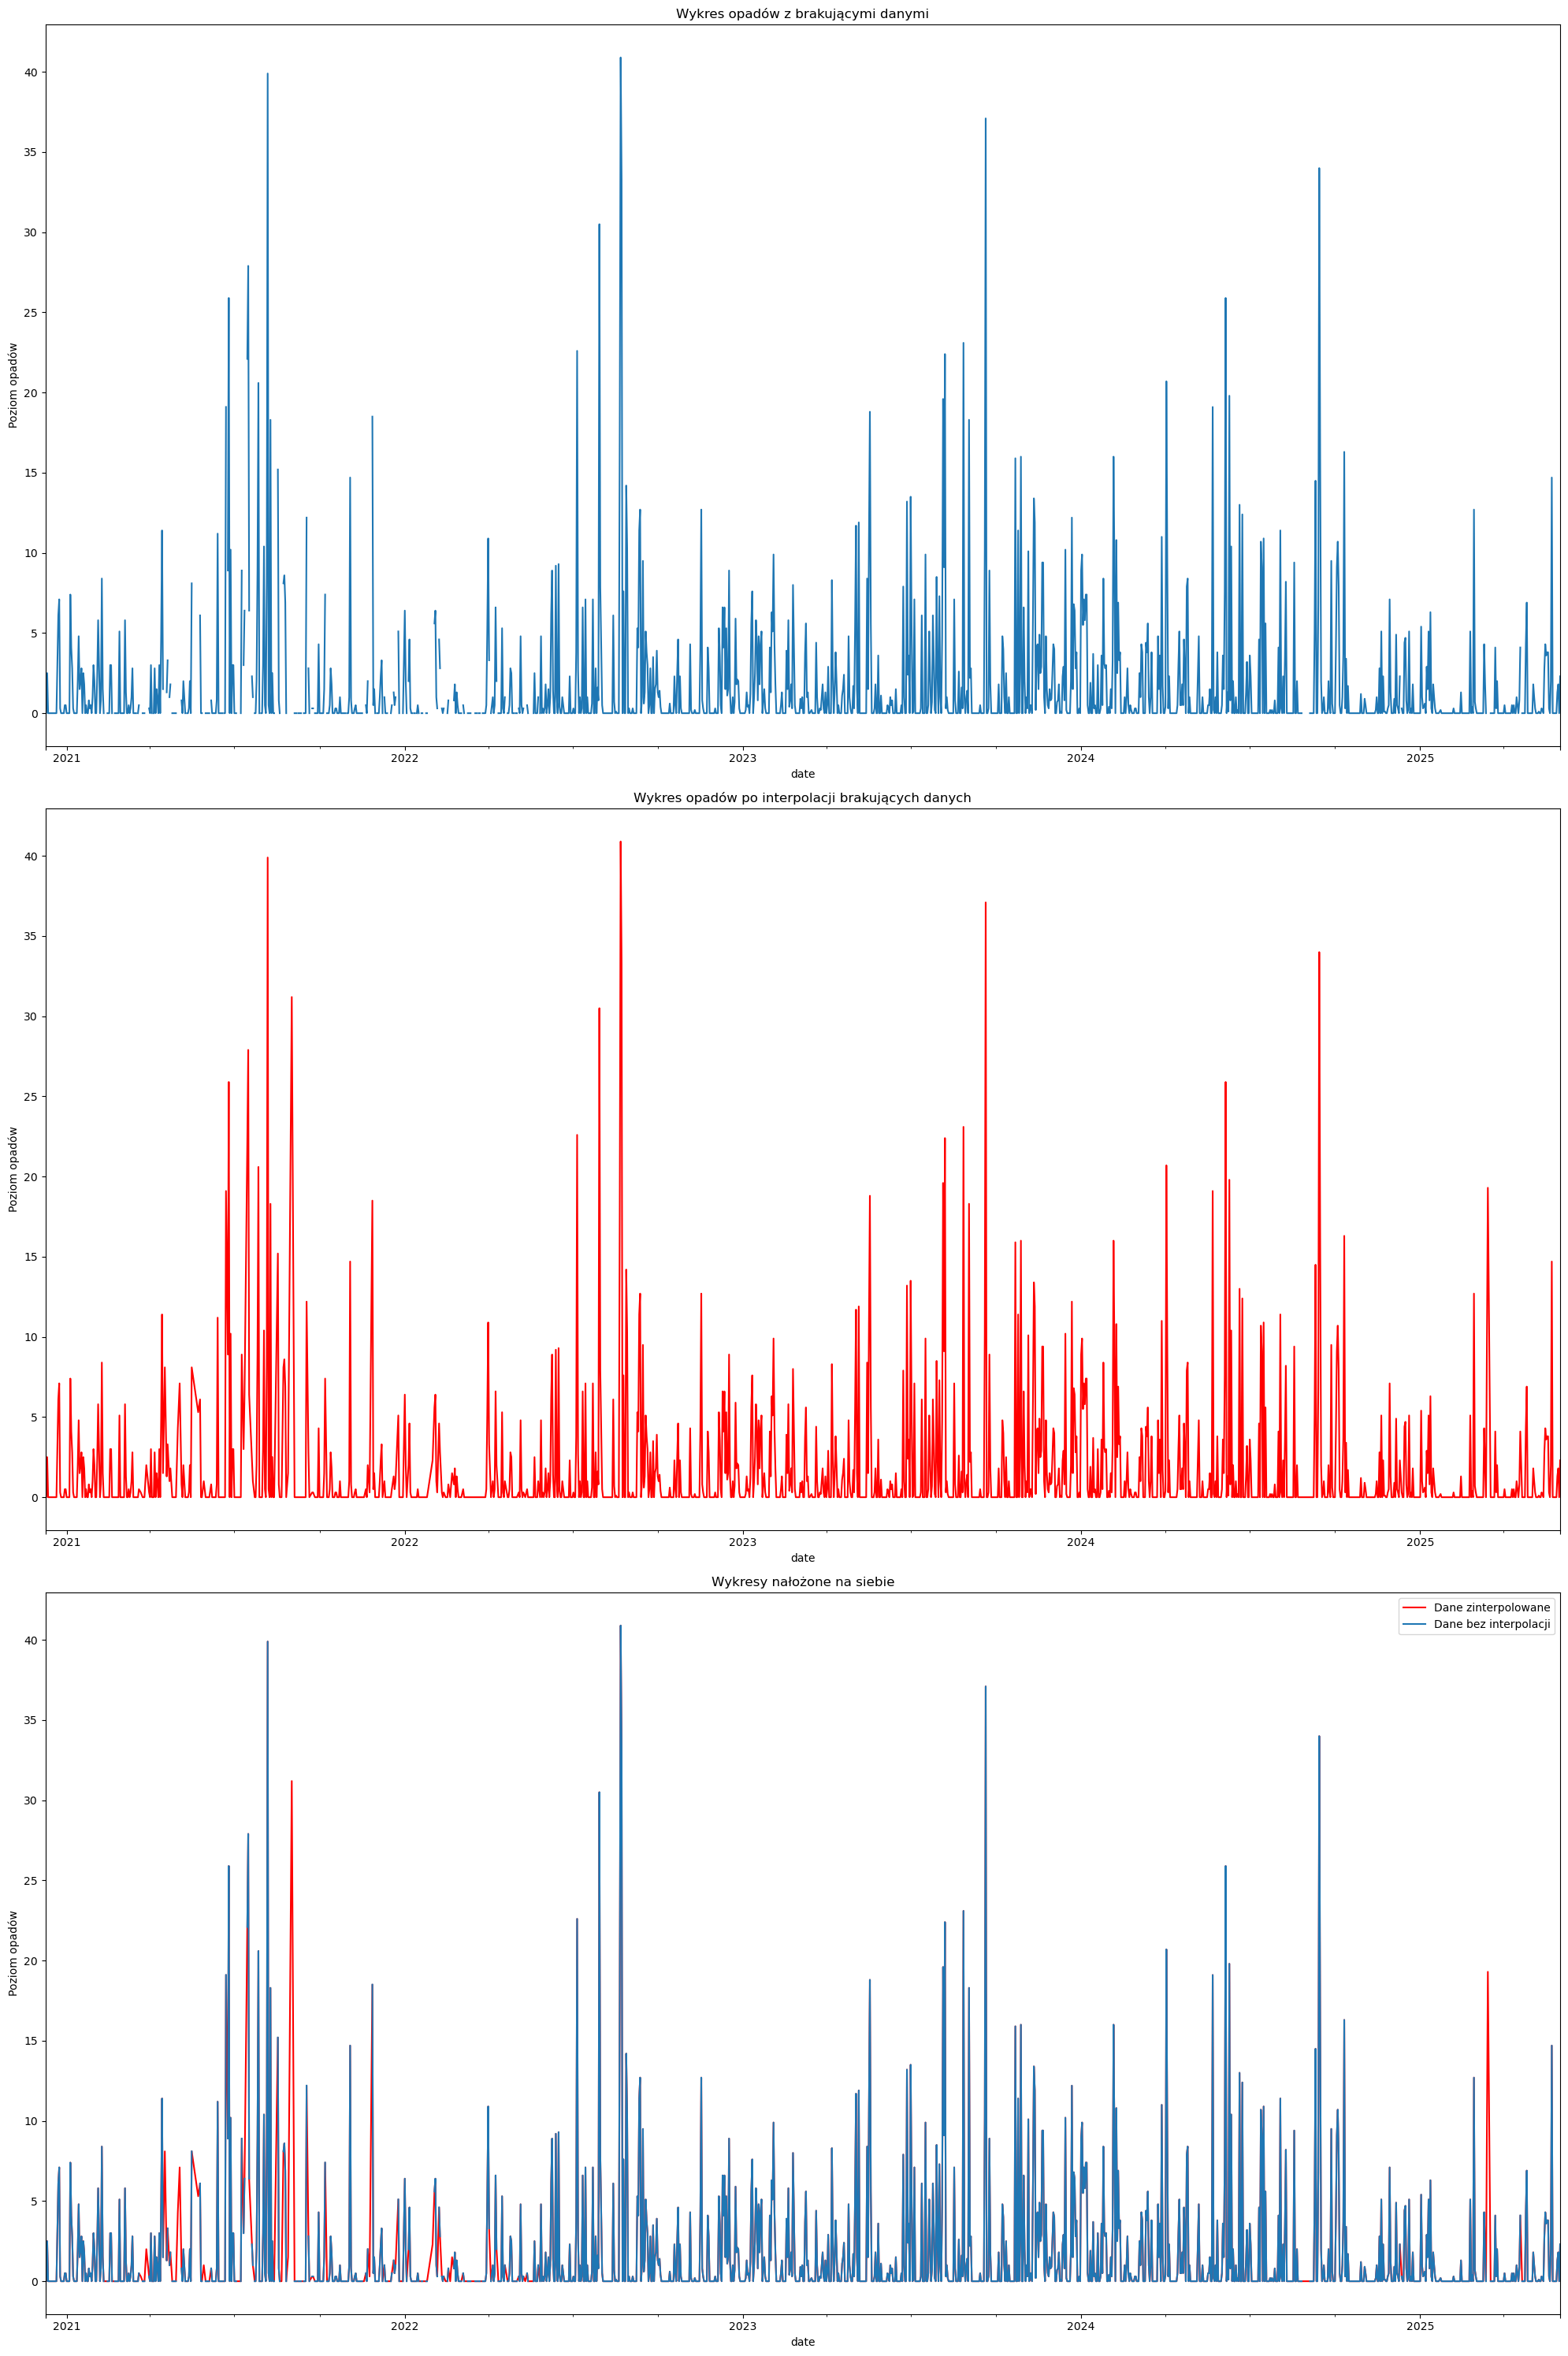

In [9]:
data2['snow'] = data2['snow'].fillna(0)
data2['opady_interp'] = data2['prcp'].interpolate(method='linear')

fig,ax = plt.subplots(3,1,figsize=(20,30))

data2['prcp'].plot(ax=ax[0])
ax[0].set_title('Wykres opadów z brakującymi danymi')
ax[0].set_ylabel('Poziom opadów')

data2['opady_interp'].plot(ax=ax[1],color='red')
ax[1].set_title('Wykres opadów po interpolacji brakujących danych')
ax[1].set_ylabel('Poziom opadów')

data2['opady_interp'].plot(ax=ax[2],color='red')
data2['prcp'].plot(ax=ax[2])
ax[2].set_title('Wykresy nałożone na siebie')
ax[2].set_ylabel('Poziom opadów')
ax[2].legend(labels=['Dane zinterpolowane','Dane bez interpolacji'])

plt.tight_layout()
plt.show()

---

## Zwiazki miedzy danymi

### Laczenie danych 

In [10]:
# df = bikers_data[['Total', 'week_day']]
df = bikers_data[['Total', 'is_weekend', 'week_day']]
df = pd.merge(left=df, right=data2, left_on=df.index, right_on=data2.index)
df.index = df['key_0']
df = df.drop(['key_0'], axis=1)
df.index.name = 'Date'
df = df.drop('prcp',axis=1)
df = df[['Total','week_day','is_weekend','tavg','tmin','tmax','opady_interp','snow','wspd','wpgt','pres']]
df

,Total,week_day,is_weekend,tavg,tmin,tmax,opady_interp,snow,wspd,wpgt,pres
Date,,,,,,,,,,,
2020-12-09,10005.0,2,0,-1.9,-2.7,-0.5,0.0,0.0,21.6,37.0,1015.6
2020-12-10,7455.0,3,0,-1.7,-2.8,-0.4,0.0,10.0,15.9,38.9,1010.6
2020-12-11,7565.0,4,0,-1.2,-3.0,0.2,2.5,20.0,8.6,22.2,1009.4
2020-12-12,5154.0,5,1,0.2,-1.0,1.3,0.0,10.0,12.2,25.9,1006.5
2020-12-13,4750.0,6,1,0.0,-0.3,1.3,0.0,0.0,4.8,13.0,1013.9
...,...,...,...,...,...,...,...,...,...,...,...
2025-05-28,36130.0,2,0,15.3,7.0,22.7,0.0,0.0,13.0,37.0,1013.5
2025-05-29,20876.0,3,0,14.1,12.0,17.3,1.3,0.0,17.3,44.5,1014.2
2025-05-30,31748.0,4,0,13.8,8.0,18.6,1.8,0.0,13.9,33.3,1019.9


## Korelacje miedzy zmiennymi

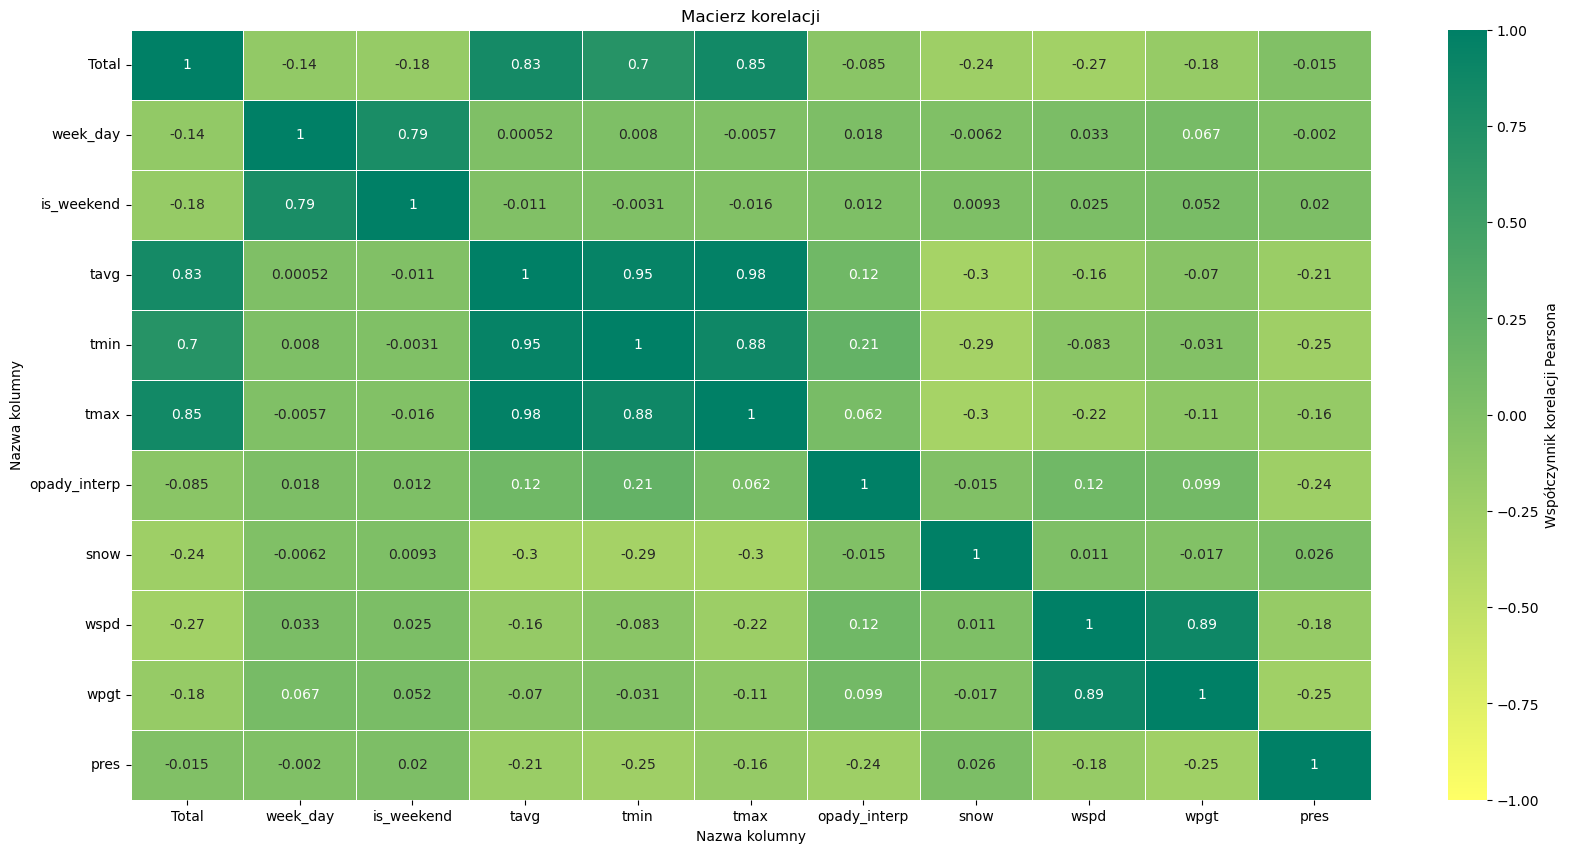

In [11]:
import seaborn as sns
fig = plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidth=0.5, vmin=-1, vmax=1, cbar_kws={'label': 'Współczynnik korelacji Pearsona'}, cmap='summer_r')
plt.xlabel('Nazwa kolumny')
plt.ylabel('Nazwa kolumny')
plt.title('Macierz korelacji')
plt.show()

Można zauważyć, że największy wpływ na ruch rowerowy w całym mieście ma maksymalna temperatura danego dnia. <br>
Niestety poza samą temperaturą Krakowianie są całkiem odporni na warunki pogodowe jeśli sugerować się samą macierzą korelacji <br>
Warto też odnotować dość oczywistą zależność między średnią, minimalną i maksymalną temperaturą, a także między średnią prędkością wiatru, <br>
a największym porywem wiatru. Zmienne te są ze sobą wysoko skorelowane, co będzie miało znaczenie przy wyborze cech do stworzenia późniejszego <br>
modelu przewidywania ruchu rowerowego w Krakowie

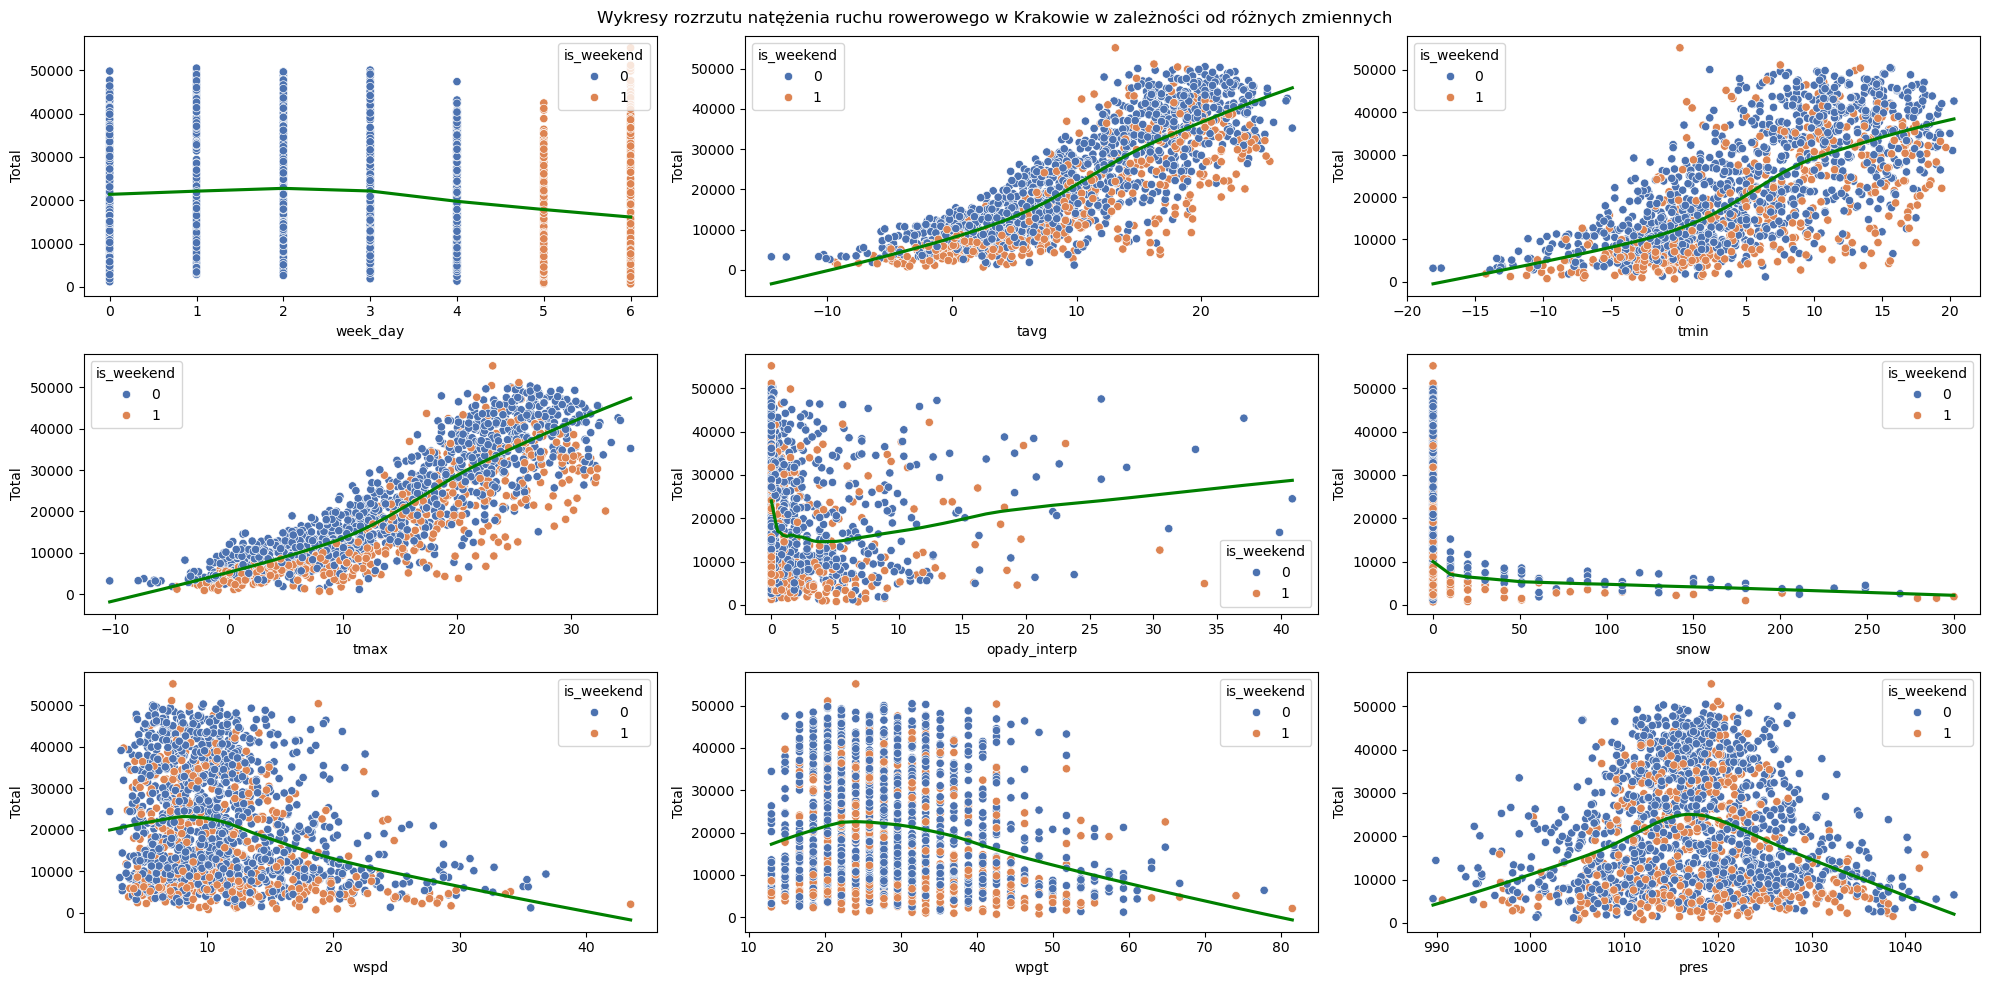

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(20,10))
axes = axes.ravel()
cols = df.columns.drop(['Total', 'is_weekend']).values
for i, col in enumerate(cols):
    sns.scatterplot(data=df, x=col, y='Total', ax=axes[i], hue='is_weekend', palette='deep')
    axes[i].set_ylabel('Liczba rowerzystów')
    sns.regplot(data=df,x=col,y='Total',ax=axes[i],line_kws={'color':'green'},lowess=True,scatter=False)
plt.suptitle('Wykresy rozrzutu natężenia ruchu rowerowego w Krakowie w zależności od różnych zmiennych')
plt.tight_layout()
plt.show()

Jak można było się spodziewać, temperatura ma oczywisty wpływ na natężenie ruchu rowerowego, toteż na wykresach dotyczących zmiennych temperaturowych można dostrzec liniową zależność. 


Na reszcie wykresów zależność liczby rowerzystów od warunków pogodowych przedstawia się w mniej liniowy sposób, przy części z nich można dostrzec górną granicę powyżej której wartości są znacznie ograniczone. Widać, że rowerzystów najbardziej zniechęca do podróży występowanie pokrywy śnieżnej, oraz wiatru z silnymi porywami.


Opady atmosferyczne wydają się mieć ograniczony wpływ na ruch rowerowy, chociaż wygładzona linia trendu wskazuje na gwałtowny spadek przy opadach większych niż 0, a następnie powolny powrót do wartości początkowej wraz z wzrostem ich poziomu. Warto zaznaczyć, że liczba obserwacji dla wyższych wartości opadów jest znacznie mniejsza, co może zniekształcać rzeczywisty obraz tej zależności.

Analiza wykresu pokazuje, że przy ciśnieniu atmosferycznym około 1015 hPa można zauważyć duże wartości ruchu rowerowego. Zarówno przy niższym, jak i wyższym ciśnieniu obserwuje się brak tak wysokich wartości natężenia ruchu, co tworzy rozkład zbliżony do normalnego. Sugeruje to istnienie optymalnych warunków pogodowych sprzyjających korzystaniu z roweru – zbyt niskie ciśnienie może być związane z opadami, a zbyt wysokie z upałami lub duszną pogodą.


### Szczegolowe wplywy kalendarzowe 

In [13]:
weekdaily = df.groupby(df.index.day_name())['Total'].mean()
dni_tygodnia = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaily = weekdaily.reindex(dni_tygodnia).reset_index()
weekdaily = weekdaily.rename(columns={'Date': 'Weekday'})
weekdaily

,Weekday,Total
0,Monday,21583.244635
1,Tuesday,23083.506438
2,Wednesday,23613.978632
3,Thursday,23086.277778
4,Friday,20796.222222
5,Saturday,15871.397436
6,Sunday,18404.841880


In [14]:
monthly = df.groupby(df.index.month)['Total'].mean().reset_index()
monthly = monthly.rename(columns={'Date': 'Miesiąc'})
monthly

,Miesiąc,Total
0,1,6809.283871
1,2,8837.780142
2,3,15300.941935
3,4,21016.553333
4,5,31092.496774
5,6,36801.322314
6,7,34691.596774
7,8,32157.943548
8,9,28895.166667
9,10,22540.491935


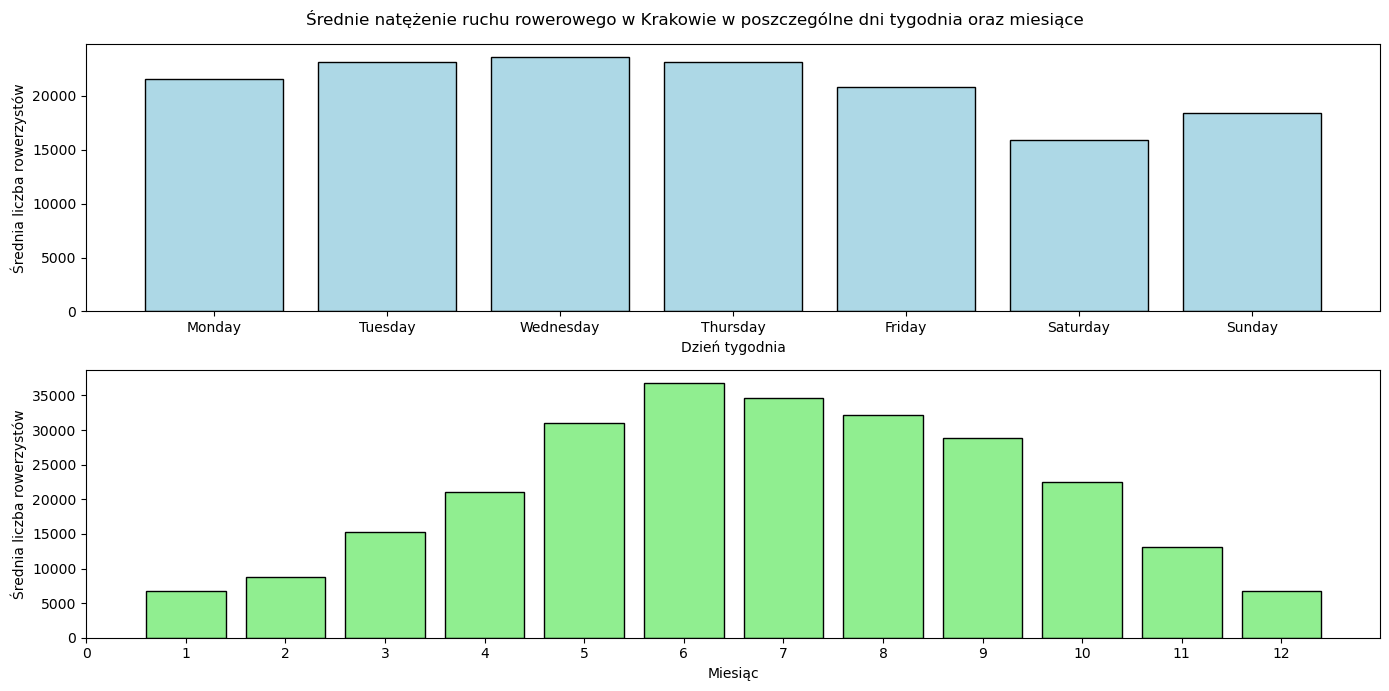

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(14,7))
axes[0].bar(weekdaily['Weekday'], weekdaily['Total'], color='lightblue', edgecolor='black')
axes[0].set_xlabel('Dzień tygodnia')
axes[0].set_ylabel('Średnia liczba rowerzystów')
axes[1].bar(monthly['Miesiąc'], monthly['Total'], color='lightgreen', edgecolor='black')
axes[1].set_xlabel('Miesiąc')
axes[1].set_ylabel('Średnia liczba rowerzystów')
axes[1].set_xticks(np.arange(0, 13, 1))
plt.suptitle('Średnie natężenie ruchu rowerowego w Krakowie w poszczególne dni tygodnia oraz miesiące')
plt.tight_layout()
plt.show()

Można zauważyć, że trend roczny do bólu przypomina rozkład normalny, czego można było się spodziewać, <br>
gdyż wiadomo, że w czerwcu człowiek chętniej wybiera się na rower niż w grudniu <br>
Warto również odnotować, że o dziwo w weekendy jest trochę mniejszy ruch rowerowy niż w tygodniu. <br> 
Należy jednakże przy tym pamiętać, że są to dane zsumowane, pochodzące ze wszystkich mierników, <br>
których znaczna ilość znajduje się w obrębie centrum miasta. Z tego powodu liczba rowerzystów "weekendowych" <br>
może maleć, ponieważ prawdopodobnie znaczna część ludzi wybiera tereny pozamiejskie na rodzinne wycieczki rowerowe. <br>

### Poszczegolne dni z najwyzszym i najnizszym ruchem w miescie

In [16]:
most_bikers = df.sort_values(by='Total', ascending=False).head(5)
most_bikers

,Total,week_day,is_weekend,tavg,tmin,tmax,opady_interp,snow,wspd,wpgt,pres
Date,,,,,,,,,,,
2021-05-09,55156.0,6,1,13.1,0.1,23.1,0.0,0.0,7.3,24.1,1019.3
2024-04-07,51120.0,6,1,16.2,7.5,25.4,0.0,0.0,7.2,20.4,1020.0
2023-07-18,50468.0,1,0,20.3,15.6,25.4,0.0,0.0,11.1,31.5,1018.7
2023-05-21,50388.0,6,1,18.1,13.4,23.0,0.0,0.0,18.8,42.6,1020.3
2023-07-04,50293.0,1,0,21.5,15.7,26.4,0.1,0.0,9.7,33.3,1014.2


In [17]:
least_bikers = df.sort_values(by='Total').head(5)
least_bikers

,Total,week_day,is_weekend,tavg,tmin,tmax,opady_interp,snow,wspd,wpgt,pres
Date,,,,,,,,,,,
2023-12-24,709.0,6,1,2.5,-0.3,8.8,6.8,0.0,18.6,42.6,1005.1
2021-12-25,780.0,5,1,-3.6,-9.7,7.9,5.1,20.0,10.1,48.2,1012.0
2023-12-03,946.0,6,1,-3.4,-7.0,-2.2,4.0,0.0,20.3,37.0,1019.9
2023-12-02,997.0,5,1,-2.1,-2.7,-1.0,4.3,180.0,15.5,33.3,1005.2
2022-12-11,1162.0,6,1,-1.4,-3.4,0.4,4.1,51.0,12.3,31.5,1004.7


Tutaj możemy zauważyć, że absolutny peak ruchu rowerowego to 9 maja 2021 roku. Jak widać warunki idealne na rower: <br>
niedziela, przyjemne 23 stopnie, bez opadów, lekki wiaterek i wysokie ciśnienie. Warto tutaj odnotować, że mniej więcej <br>
w tym okresie luzowane był obostrzenia covidowe, co mogło również wyjątkowo zachęcić Krakowian do aktywności rowerowej. 

Jeżeli chodzi o najniższe wyniki, to dość oczywiste są 2 pierwsze miejsca w postaci Świąt Bożego Narodzenia, w dodatku przy niskiej temperaturze <br> 
i opadach deszczu, a nawet śniegu


---

## Model predykcyjny

### Rozklad zmiennej objasnianej

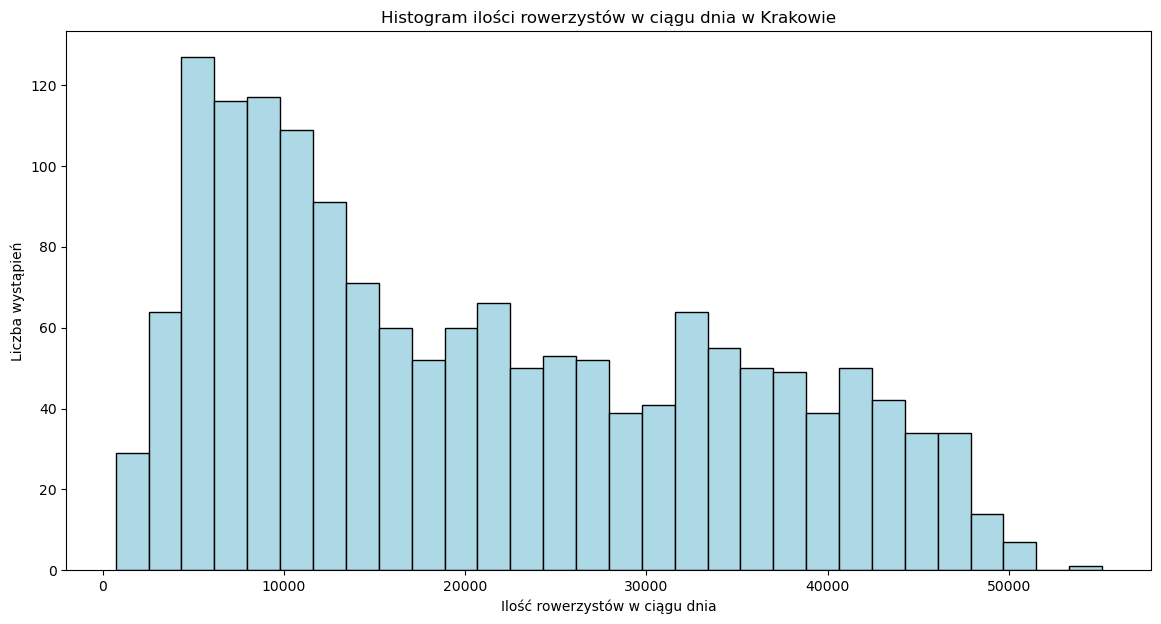

In [18]:
plt.figure(figsize=(14,7))
plt.hist(df['Total'], bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Ilość rowerzystów w ciągu dnia')
plt.ylabel('Liczba wystąpień')
plt.title('Histogram ilości rowerzystów w ciągu dnia w Krakowie')
plt.show()

Rozkład dziennej liczby rowerzystów w Krakowie jest silnie prawoskośny – większość dni cechuje się umiarkowanym <br>
natężeniem ruchu, podczas gdy dni o bardzo wysokiej liczbie użytkowników są stosunkowo rzadkie. Sugeruje to, że <br>
ekstremalne wartości występują głównie w specyficznych warunkach pogodowych lub kalendarzowych, natomiast codzienny <br>
ruch rowerowy pozostaje na niższym, bardziej stabilnym poziomie. Rozkład jest dość ciągły, choć liczba dni spada wraz z ruchem.

### Tworzenie modelu predykcyjnego

In [19]:
df.head()

,Total,week_day,is_weekend,tavg,tmin,tmax,opady_interp,snow,wspd,wpgt,pres
Date,,,,,,,,,,,
2020-12-09,10005.0,2,0,-1.9,-2.7,-0.5,0.0,0.0,21.6,37.0,1015.6
2020-12-10,7455.0,3,0,-1.7,-2.8,-0.4,0.0,10.0,15.9,38.9,1010.6
2020-12-11,7565.0,4,0,-1.2,-3.0,0.2,2.5,20.0,8.6,22.2,1009.4
2020-12-12,5154.0,5,1,0.2,-1.0,1.3,0.0,10.0,12.2,25.9,1006.5
2020-12-13,4750.0,6,1,0.0,-0.3,1.3,0.0,0.0,4.8,13.0,1013.9


Warto dla pewności usunąć brakujące dane, gdyby jeszcze jakieś się znalazły

In [20]:
df = df.dropna()

### Wybor cech
W tym przypadku wybór cech jest bardzo ważny, gdyż trzeba wybrać cechy nieskorelowane ze sobą dla poprawnego działania modelu <br>
Jak wspomniano wyżej poszczególne statystyki temperatury są ze sobą wysoko skorelowane, więc została z nich wybrana tylko maksymalna temperatura, <br>
która najlepiej koreluje z zmienną objaśnianą. Podobnie uczyniono ze statystykami wiatru i postawiono na średnią prędkość wiatru. <br>
Dodatkowo wzięto pod uwagę zmienną logiczną mówiącą czy dany dzień był jednym z dni weekendu.

In [21]:
X = df[['is_weekend', 'tmax', 'snow', 'wspd', 'pres', 'opady_interp']]
y = df['Total']

### Normalizacja cech
Również konieczne działanie, gdyż sieć neuronowa która zostanie stworzona potrzebuje mieć dane znormalizowane, żeby poprawic szybkość i jakośc działania. <br>
W tym celu dane zostały znormalizowane do przedziału [0;1] za pomocą skalowania min-max.

In [22]:
X_Scaler = MinMaxScaler()
X_scaled = X_Scaler.fit_transform(X)
y = y.values.reshape(-1,1)
Y_Scaler = MinMaxScaler()
y_scaled = Y_Scaler.fit_transform(y)

### Podzial danych na zbiory 
Dane zostały podzielone na uczące i testowe w stosunku 30:70, dodatkowo ustawiono ziarno losowości aby zapewnić powtarzalność wyników i umożliwić weryfikację postępów w procesie uczenia.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=100)

### Stworzenie modelu 
Model opiera się na sieci neuronowej, składającej się z warstwy wejściowej, 3 warstw ukrytych mających na celu wykrycie nieliniowych zależności między zmiennymi oraz warstwy wyjściowej, składającej się z 1 neurona dającego nam przewidywaną wartość ilości rowerzystów na ulicach miasta Krakowa.

In [24]:
model = Sequential([Input(shape=(X_train.shape[1],)),
                    Dense(16, activation='tanh'),
                    Dense(8, activation='tanh'),
                    Dense(4, activation='tanh'),
                    Dense(1)
                   ])

Następnie model został skompilowany, nauczony oraz przewidziano na nim wartości zapisane w zbiorze testowym.

In [25]:
model.compile(optimizer='adam', loss=Huber())

In [26]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=0)

In [27]:
y_pred_scaled = model.predict(X_test)
y_pred = Y_Scaler.inverse_transform(y_pred_scaled)
y_test_original = Y_Scaler.inverse_transform(y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [28]:
mae = mean_absolute_error(y_test_original, y_pred)
r2_score(y_test_original, y_pred)
print(f'Błąd MAE modelu wynosi: {mae}, wsp. determinacji R2 wynosi: {r2_score}')

Błąd MAE modelu wynosi: 4318.373652380021, wsp. determinacji R2 wynosi: <function r2_score at 0x000002734A99DE40>


### Ocena dzialania modelu
Model osiąga całkiem dobre wyniki – wartość błędu MAE wynosi 3840, a współczynnik determinacji R2 osiąga poziom 0,84, co świadczy o przyzwoitej jakości predykcji. Choć rezultaty są zadowalające, mogłyby być lepsze.

Jednym z możliwych kierunków ulepszeń może być uwzględnienie dodatkowych danych pogodowych, takich jak stopień zachmurzenia, widoczność lub wilgotność względna. Takie zmienne mogłyby pomóc lepiej uchwycić warunki wpływające na aktywność rowerową. Innym pomysłem jest rozbudowanie projektu o uwzględnienie także danych o stanie jakości powietrza, które z pewnością mają znaczący wpływ na aktywność rowerową Krakowian, i są powiązane z warunkami pogodowymi.

Warto również zaznaczyć, że dane pochodzą ze stacji pomiarowych rozmieszczonych w różnych częściach miasta. Ponieważ Kraków jest rozległy i zróżnicowany pod względem zabudowy, agregowanie danych z wielu lokalizacji może wprowadzać szum i utrudniać modelowi dokładne odwzorowanie lokalnych wzorców ruchu rowerowego. W przyszłości warto rozważyć podejście uwzględniające przestrzenne zróżnicowanie danych np. modelowanie osobno dla poszczególnych stacji lub uwzględnienie współrzędnych geograficznych.

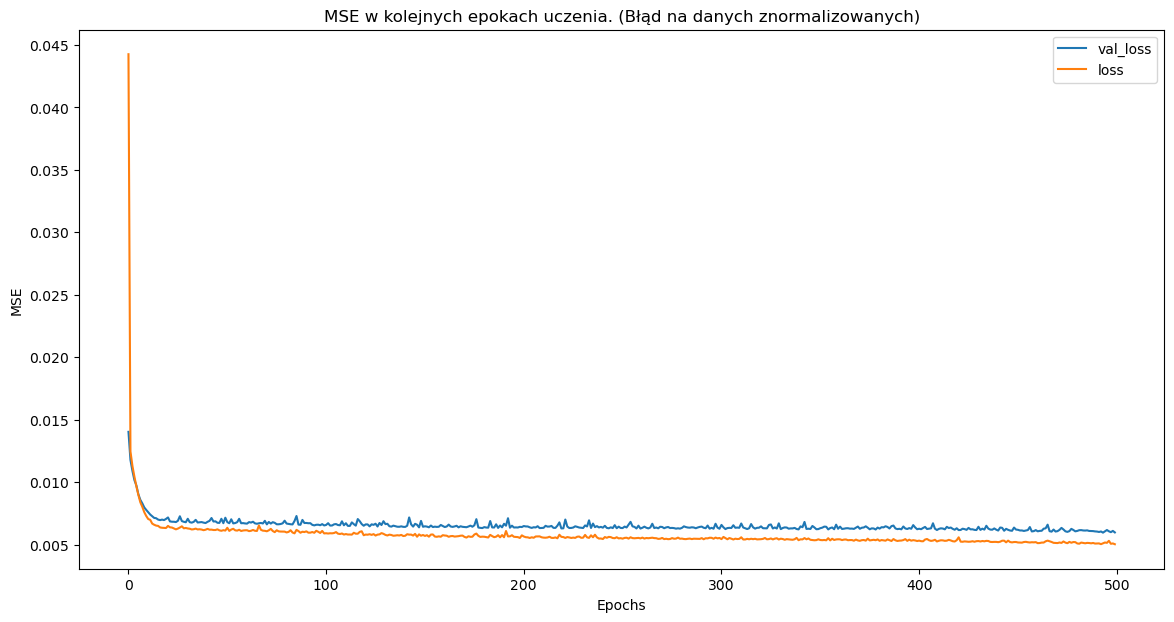

In [29]:
fig = plt.figure(figsize=(14,7))
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='loss')
plt.title('MSE w kolejnych epokach uczenia. (Błąd na danych znormalizowanych)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

Na sam koniec zapisano model oraz obiekty skalujące do plików w celu stworzenia dashboardu

In [30]:
import joblib
joblib.dump(X_Scaler, 'x_scaler.pkl')
joblib.dump(Y_Scaler, 'y_scaler.pkl')

['y_scaler.pkl']

In [31]:
from keras.models import save_model
save_model(model, 'nn_model.h5')

Dodatkowo można zobaczyć proces uczenia modelu. Widać, że model został dobrze nauczony, nie jest przetrenowany, ani niedouczony <br>